# 最終課題

## 参考

https://github.com/baibai25/lecture/blob/master/gtm/modeling.ipynb

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
sns.set_style('whitegrid')

## LORENZ

In [109]:
# LORENZ.DAT
data = pd.read_table('../data/LORENZ.DAT', header=None)

# scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = np.array(data).flatten()

In [110]:
# create d-dimensional data
t, d = 17, 3
lagged = []

for i in range(0, d+1):
    lagged.append(np.roll(data, -t*i)[:-t*d])
    
lagged = np.array(lagged).T
lagged.shape

(16333, 4)

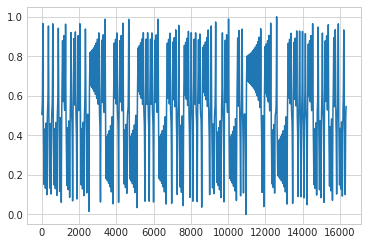

In [111]:
plt.plot(lagged[:, 0])

In [112]:
df = pd.DataFrame(lagged)
df.head()

,0,1,2,3
0,0.505204,0.530725,0.597134,0.872868
1,0.507508,0.532470,0.605311,0.894545
2,0.509557,0.534358,0.614286,0.914680
3,0.511395,0.536407,0.624128,0.932510
4,0.513057,0.538637,0.634907,0.947239


In [113]:
# split data
x = df[df.columns[0:-1]]
y = df[df.columns[-1]]

x = np.array(x)
y = np.array(y)

In [114]:
from sklearn.neural_network import MLPRegressor

In [115]:
"""
Note:
Training data: x[0:num_train]
Test data: x[num_train:num_train+num_test]

e.g
num_train = 1000
num_test = 500

Training data x[0:1000]
Test data x[1000:1000+500]
"""
num_train = 1000
num_test = 500
X_train, y_train = x[0:num_train], y[0:num_train]

In [116]:
clf = MLPRegressor(hidden_layer_sizes=(20), activation='relu',
                   batch_size=200, shuffle=False, solver='adam', random_state=42, verbose=False)

clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [117]:
"""
Predict using predicted value

e.g.
D:Delay, P:Predicted

D0, D1, D2 -> P1
D1, D2, P1 -> P2
D2, P1, P2 -> P3
"""

pred_stack = []
X_test = x[num_train:num_train+num_test]

for i in range(4):
    pred = clf.predict(X_test)

    pred_stack = np.append(pred_stack, pred)
    X_test = np.concatenate([X_test, pred.reshape(num_test, 1)], axis=1)
    X_test = np.delete(X_test, 0, axis=1)

print(pred_stack.shape)

(2000,)


In [118]:
# calc error
# Ref: Nonlinear prediction of chaotic time series using support vector machines
# eq. (10)
X_test = x[num_train:num_train+len(pred_stack)]
error = 0
for i in range(len(pred_stack)):
    error += (X_test[i] - pred_stack[i])**2 / X_train.var()

print(error/len(pred_stack))
print(np.log10(error/len(pred_stack)))

[1.45101729 1.39744867 1.35680806]
[0.16167259 0.14533586 0.13251841]


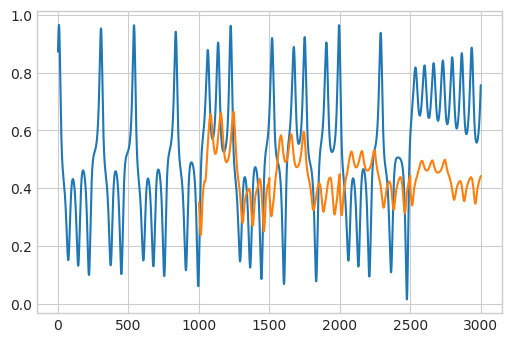

In [119]:
plt.figure(dpi=100)
plt.plot(y[0:num_train+len(pred_stack)])
plt.plot(range(num_train, num_train+len(pred_stack)), pred_stack)

## MackeyGlass

In [120]:
# LORENZ.DAT
data = pd.read_table('../data/Mackey_Glass.dat', header=None)

# scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = np.array(data).flatten()

In [121]:
# create d-dimensional data
t, d = 90, 3
lagged = []

for i in range(0, d+1):
    lagged.append(np.roll(data, -t*i)[:-t*d])
    
lagged = np.array(lagged).T
lagged.shape

(931, 4)

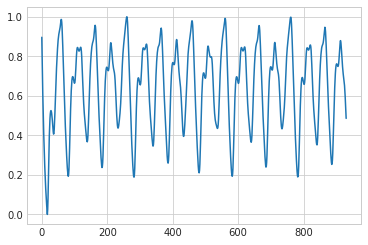

In [122]:
plt.plot(lagged[:, 0])

In [123]:
df = pd.DataFrame(lagged)
df.head()

,0,1,2,3
0,0.896118,0.624856,0.318456,0.579818
1,0.791781,0.656058,0.288417,0.530719
2,0.697372,0.677831,0.263374,0.483515
3,0.611948,0.691093,0.245412,0.438364
4,0.534652,0.696947,0.237110,0.395414


In [124]:
# split data
x = df[df.columns[0:-1]]
y = df[df.columns[-1]]

x = np.array(x)
y = np.array(y)

In [125]:
"""
Note:
Training data: x[0:num_train]
Test data: x[num_train:num_train+num_test]

e.g
num_train = 500
num_test = 100

Training data x[0:500]
Test data x[500:500+100]
"""
num_train = 500
num_test = 100
X_train, y_train = x[0:num_train], y[0:num_train]

In [126]:
clf = MLPRegressor(hidden_layer_sizes=(20), activation='relu',
                   batch_size=200, shuffle=False, solver='adam', random_state=42, verbose=False)

clf.fit(X_train, y_train)

/home/tatsuki/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [127]:
"""
Predict using predicted value

e.g.
D:Delay, P:Predicted

D0, D1, D2 -> P1
D1, D2, P1 -> P2
D2, P1, P2 -> P3
"""

pred_stack = []
X_test = x[num_train:num_train+num_test]

for i in range(4):
    pred = clf.predict(X_test)

    pred_stack = np.append(pred_stack, pred)
    X_test = np.concatenate([X_test, pred.reshape(num_test, 1)], axis=1)
    X_test = np.delete(X_test, 0, axis=1)

print(pred_stack.shape)

(400,)


In [128]:
# calc error
# Ref: Nonlinear prediction of chaotic time series using support vector machines
# eq. (10)
X_test = x[num_train:num_train+len(pred_stack)]
error = 0
for i in range(len(pred_stack)):
    error += (X_test[i] - pred_stack[i])**2 / X_train.var()

print(error/len(pred_stack))
print(np.log10(error/len(pred_stack)))

[0.99945559 0.91006228 0.85299805]
[-0.0002365  -0.04092889 -0.06905196]


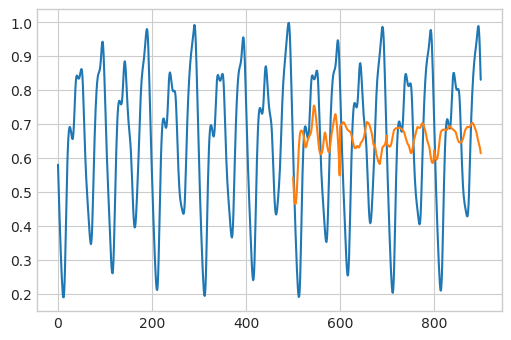

In [129]:
plt.figure(dpi=100)
plt.plot(y[0:num_train+len(pred_stack)])
plt.plot(range(num_train, num_train+len(pred_stack)), pred_stack)

## HENON

In [130]:
# LORENZ.DAT
data = pd.read_table('../data/HENON.DAT', header=None)

# scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data = np.array(data).flatten()

In [131]:
# create d-dimensional data
t, d = 2, 3
lagged = []

for i in range(0, d+1):
    lagged.append(np.roll(data, -t*i)[:-t*d])
    
lagged = np.array(lagged).T
lagged.shape

(16378, 4)

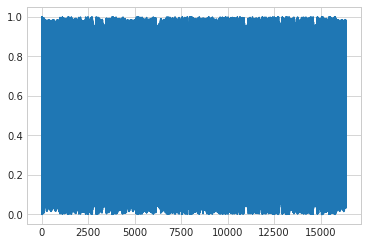

In [132]:
plt.plot(lagged[:, 0])

In [133]:
df = pd.DataFrame(lagged)
df.head()

,0,1,2,3
0,0.438244,0.524923,0.999494,0.488670
1,0.002414,0.528946,0.513330,0.000106
2,0.524923,0.999494,0.488670,0.501655
3,0.528946,0.513330,0.000106,0.509141
4,0.999494,0.488670,0.501655,0.999934


In [134]:
# split data
x = df[df.columns[0:-1]]
y = df[df.columns[-1]]

x = np.array(x)
y = np.array(y)

In [135]:
"""
Note:
Training data: x[0:num_train]
Test data: x[num_train:num_train+num_test]

e.g
num_train = 1000
num_test = 500

Training data x[0:1000]
Test data x[1000:1000+500]
"""
num_train = 1000
num_test = 500
X_train, y_train = x[0:num_train], y[0:num_train]

In [136]:
clf = MLPRegressor(hidden_layer_sizes=(20), activation='relu',
                   batch_size=200, shuffle=False, solver='adam', random_state=42, verbose=False)

clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [137]:
"""
Predict using predicted value

e.g.
D:Delay, P:Predicted

D0, D1, D2 -> P1
D1, D2, P1 -> P2
D2, P1, P2 -> P3
"""

pred_stack = []
X_test = x[num_train:num_train+num_test]

for i in range(4):
    pred = clf.predict(X_test)

    pred_stack = np.append(pred_stack, pred)
    X_test = np.concatenate([X_test, pred.reshape(num_test, 1)], axis=1)
    X_test = np.delete(X_test, 0, axis=1)

print(pred_stack.shape)

(2000,)


In [138]:
# calc error
# Ref: Nonlinear prediction of chaotic time series using support vector machines
# eq. (10)
X_test = x[num_train:num_train+len(pred_stack)]
error = 0
for i in range(len(pred_stack)):
    error += (X_test[i] - pred_stack[i])**2 / X_train.var()

print(error/len(pred_stack))
print(np.log10(error/len(pred_stack)))

[1.34540717 1.79347565 1.67721091]
[0.12885374 0.25369548 0.22458768]


(950, 1050)

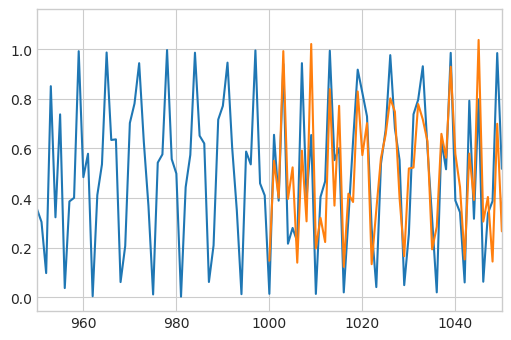

In [147]:
plt.figure(dpi=100)
plt.plot(y[0:num_train+len(pred_stack)])
plt.plot(range(num_train, num_train+len(pred_stack)), pred_stack)
plt.xlim(950, 1050)

# Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras import regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
print(keras.wrappers.scikit_learn.__file__)

In [ ]:
def build_model():
    model = Sequential()
    model.add(Dense(3, input_shape=(X_train.shape[1],),
                    kernel_regularizer=regularizers.l2(0.0001), kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(20, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(20, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(20, kernel_regularizer=regularizers.l2(0.0001), kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Activation('linear'))
    
    adam = Adam() #epsilon=1e-08
    model.compile(loss='mse', optimizer=adam)
    #model.summary()
    
    return model

In [ ]:
es_cb = EarlyStopping(monitor='binary_crossentropy', verbose=1, mode='auto')

estimator = KerasRegressor(build_fn=build_model, epochs=100, batch_size=10, verbose=0)
estimator.fit(X_train, y_train, shuffle=False) #, callbacks=[es_cb]

In [ ]:
pred1 = estimator.predict(X_test)
print('R^2 method', estimator.score(X_train, y_train))
print('R^2 method', estimator.score(X_test, y_test))
print('R^2 import', r2_score(y_test, pred1))
print('MSE: ', mean_squared_error(y_test, pred1))

In [ ]:
# calc error
# Ref: Nonlinear prediction of chaotic time series using support vector machines
# eq. (10)

error = 0
for i in range(len(pred1)):
    error += (X_test[i] - pred1[i])**2 / X_train.var()

print(error/len(pred1))
print(np.log10(error/len(pred1)))

In [ ]:
plt.figure(dpi=100)
plt.plot(pred1)
plt.plot(y_test, alpha=0.5)